In [1]:
import pandas as pd
import numpy as np
import igraph

import seaborn as sns
import operator

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


from sklearn.linear_model import LinearRegression

#### TODO
1. Make 4th.
3. Make 2.
4. Draw ER graph in the 5th
5. 1(b) make inverse ccumulation.

6. Make a proper fit in the 1st.
7. (optional) Optimize 3.c
8. Draw graph with atlas layout
9. Use pydot to draw graph


#### Future improvment
1. try to use time

#### Load data

In [116]:
data_foled = 'data/'
data_file = 'network.csv'
directed = False

In [117]:
df = pd.read_csv(data_foled+data_file, header=0, error_bad_lines=False)
df.columns = ['source_node', 'target_node']

In [118]:
df.head(10)

,source_node,target_node
0,-1,694
1,0,545
2,0,694
3,0,734
4,0,531
5,0,557
6,0,153
7,0,723
8,0,724
9,0,539


In [119]:
tuples = [tuple(x) for x in df.values]
g = igraph.Graph.TupleList(tuples, directed = directed)

In [120]:
g.write_gml("g.gml")

In [121]:
number_nodes = g.vcount()
number_links = g.ecount()

erg = igraph.Graph.Erdos_Renyi(n=number_nodes, m=number_links, directed=directed)

In [122]:
erg.write_gml("erg.gml")

### 1. Plot distribution (for your network and corresponding Erdos-Renyi graph). Fit them with power-law function and exponential function (do not forget to calculate ratio $chi^2/Ndof$)

#### a. Distribution of node degrees $P(k)$

In [7]:
g_d = g.degree()
g_d_unique, g_d_counts = np.unique(g_d, return_counts=True)

erg_d = erg.degree()
erg_d_unique, erg_d_counts = np.unique(erg_d, return_counts=True)

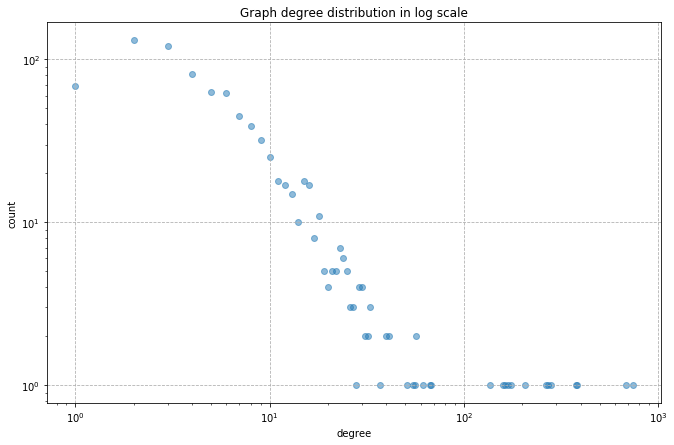

In [8]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

In [9]:
# r = np.polyfit(np.log(x), y, 1)

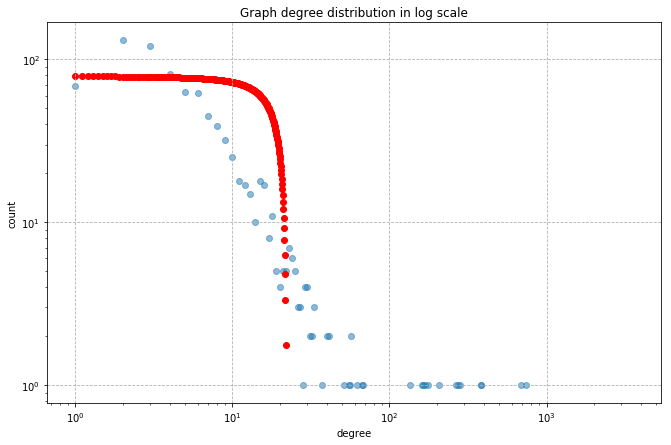

In [10]:
def graph_degree_approximator(x):
    return -np.exp(x/5)+80 #x**lr.coef_#

x = np.linspace(1,10000,100000)
y = graph_degree_approximator(x)


figure(figsize=(11,7))


plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)
plt.scatter(x = x, y = y, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

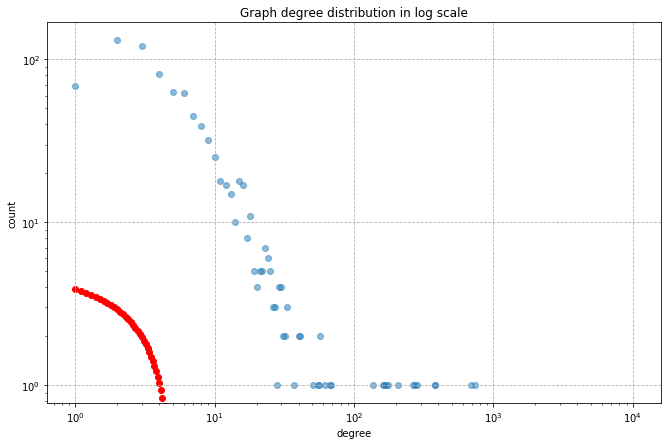

In [11]:
# X = np.stack((x, np.power(x, 2)))

# lr = LinearRegression()
# lr.fit(X.transpose(), y)

# a = lr.intercept_
# b = lr.coef_[0]
# c = lr.coef_[1]

# def graph_degree_approximator(x,a,b,c):
#     return x*b+(x**2)*c+a


x = g_d_unique
y = g_d_counts

lr = LinearRegression()
lr.fit(np.log(x.reshape(-1,1)), np.log(y))

a = lr.intercept_
b = lr.coef_[0]

def graph_degree_approximator(x,a,b):
    return x*b+a

# def graph_degree_approximator(x,a,b):
#     return x**r[0]+r[1] *a
#     return x**r[0]+r[1] *a

x = np.linspace(1,10000,100000)
y = graph_degree_approximator(x,a,b)#lr.predict(x.reshape(-1,1))


figure(figsize=(11,7))


plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)
plt.scatter(x = x, y = y, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

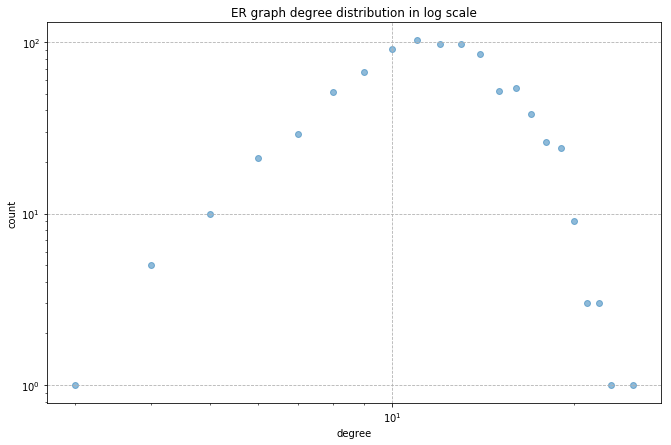

In [52]:

figure(figsize=(11,7))
plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5)

plt.title('ER graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

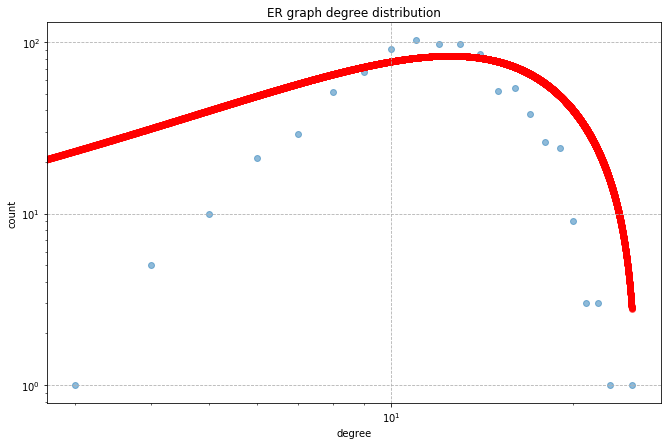

In [13]:
def er_graph_degree_approximator(x, sigma, mu):
    return (sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

x = np.linspace(1,10000,10000)
mu = np.mean(x)
sigma = np.std(x)
                                                   
y = er_graph_degree_approximator(x, sigma, mu)-20


figure(figsize=(11,7))
plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5)

plt.scatter(x = x/400,
            y = y/70-20, 
            alpha=0.5,
            color='red')

plt.title('ER graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

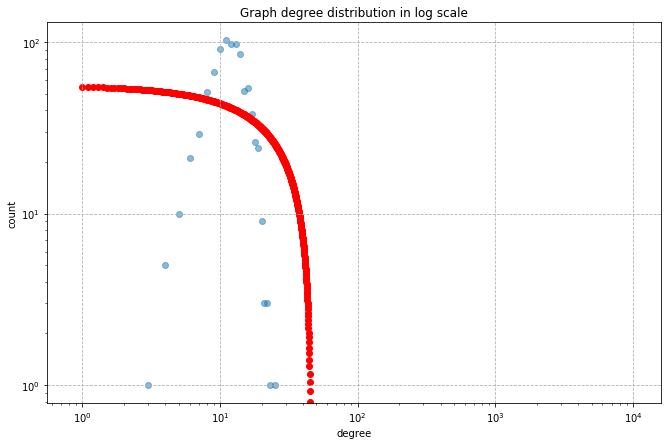

In [14]:
x = erg_d_unique
y = erg_d_counts
            
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]


def graph_degree_approximator(x,a,b):
    return x*b+a

# def graph_degree_approximator(x,a,b):
#     return x**r[0]+r[1] *a
#     return x**r[0]+r[1] *a

x = np.linspace(1,10000,100000)
y = graph_degree_approximator(x,a,b)


figure(figsize=(11,7))


plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5)
plt.scatter(x = x, y = y, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

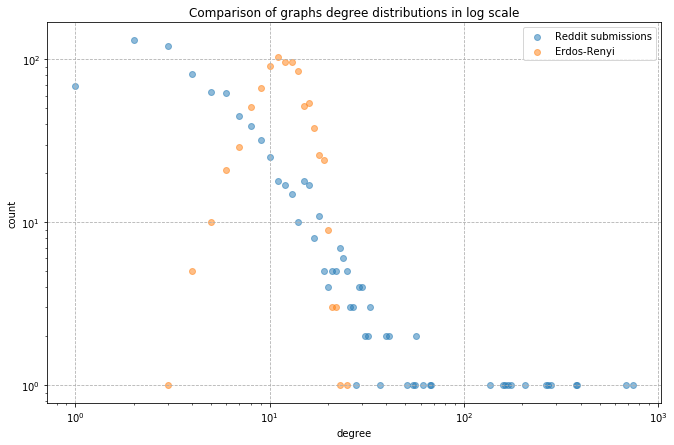

In [87]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5, label='Reddit submissions')

plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5, label="Erdos-Renyi")

plt.title('Comparison of graphs degree distributions in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.legend(loc='upper right', frameon=True)

plt.grid(linestyle='dashed')
plt.show() # show the plot

#### b. Cumulative node degree distribution

In [15]:
g_d_counts

array([ 69, 132, 121,  81,  63,  62,  45,  39,  32,  25,  18,  17,  15,
        10,  18,  17,   8,  11,   5,   4,   5,   5,   7,   6,   5,   3,
         3,   1,   4,   4,   2,   2,   3,   1,   2,   2,   1,   1,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1])

In [16]:
np.cumsum(g_d_counts)

array([ 69, 201, 322, 403, 466, 528, 573, 612, 644, 669, 687, 704, 719,
       729, 747, 764, 772, 783, 788, 792, 797, 802, 809, 815, 820, 823,
       826, 827, 831, 835, 837, 839, 842, 843, 845, 847, 848, 849, 850,
       852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864,
       865, 866, 867, 868])

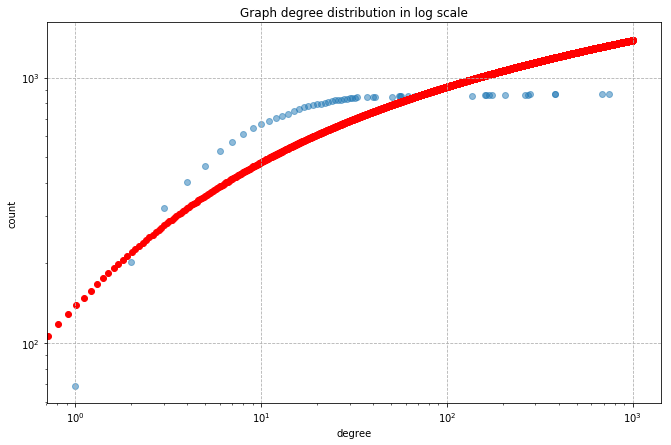

In [17]:
figure(figsize=(11,7))

def graph_degree_approximator(x):
    return np.exp(-x)

x = np.linspace(1,1000,10000)
y = np.log(x**2)*100#graph_degree_approximator(x)

plt.scatter(x = g_d_unique,
            y = np.cumsum(g_d_counts), 
            alpha=0.5)

plt.scatter(x = x-0.99, y = y, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

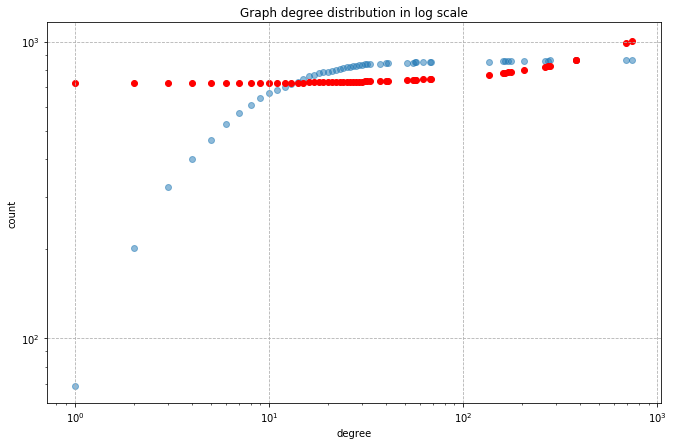

In [18]:
x = g_d_unique
y = np.cumsum(g_d_counts)
            
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]


def graph_degree_approximator(x,a,b):
    return x*b+a

y2 = graph_degree_approximator(x,a,b)

figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = y, 
            alpha=0.5)

plt.scatter(x = x, y = y2, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

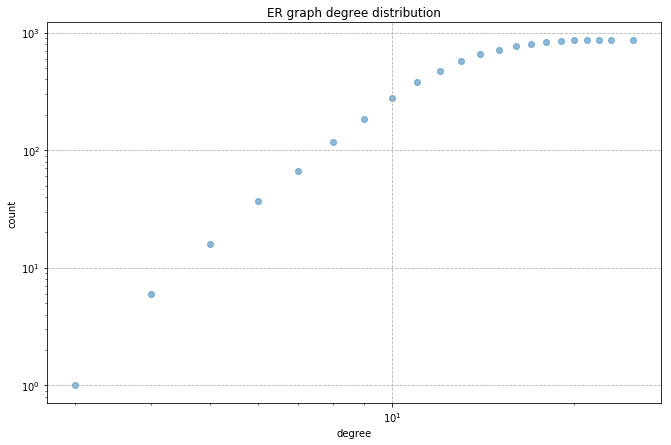

In [19]:
figure(figsize=(11,7))
plt.scatter(x = erg_d_unique,
            y = np.cumsum(erg_d_counts), 
            alpha=0.5)

plt.title('ER graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)


plt.yscale('log')
plt.xscale('log')

plt.grid(linestyle='dashed')
plt.show() # show the plot

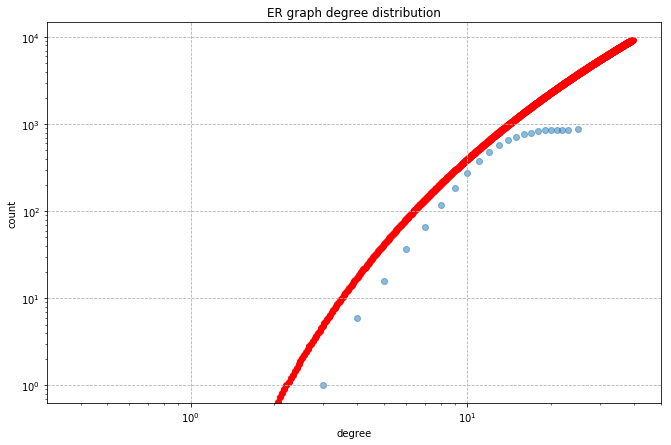

In [20]:
figure(figsize=(11,7))

def graph_degree_approximator(x):
    return np.exp(-x)

x = np.linspace(1,40,1000)
y = np.log(x)**7#graph_degree_approximator(x)

plt.scatter(x = erg_d_unique,
            y = np.cumsum(erg_d_counts), 
            alpha=0.5)

plt.scatter(x = x-0.5, y = y, color='red')


plt.title('ER graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)


plt.yscale('log')
plt.xscale('log')

plt.grid(linestyle='dashed')
plt.show() # show the plot

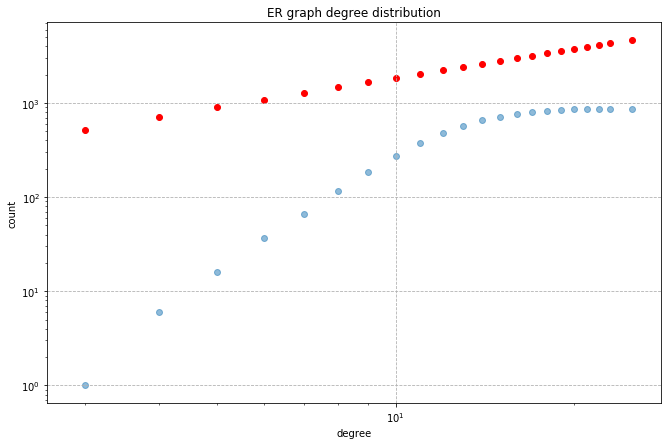

In [21]:
xs = erg_d_unique
y = np.cumsum(erg_d_counts)
            
lr = LinearRegression()
lr.fit(xs.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]

figure(figsize=(11,7))

def graph_degree_approximator(x,a,b):
    return x*a+b

plt.scatter(x = xs,
            y = y, 
            alpha=0.5)

plt.scatter(x = xs, y = -1*graph_degree_approximator(xs,a,b), color='red')


plt.title('ER graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)


plt.yscale('log')
plt.xscale('log')

plt.grid(linestyle='dashed')
plt.show() # show the plot

#### b.2 Inverse cumulative node degree distribution

In [60]:
g_d2 = g.degree()
g_d_unique2, g_d_counts2 = np.unique(g_d2, return_counts=True)

erg_d2 = erg.degree()
erg_d_unique2, erg_d_counts2 = np.unique(erg_d2, return_counts=True)

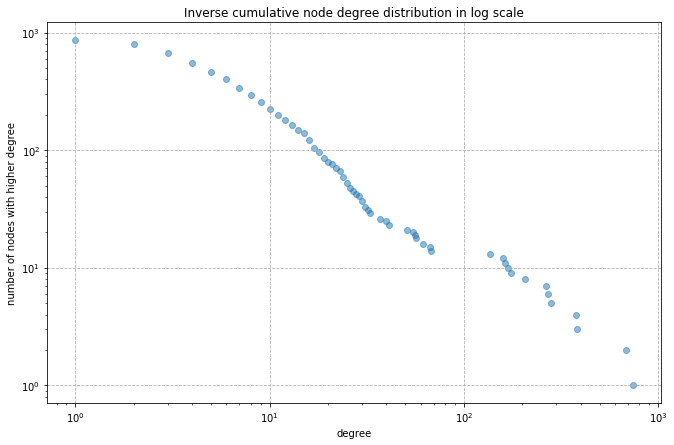

In [71]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = np.cumsum(g_d_counts[::-1])[::-1], 
            alpha=0.5)

plt.title('Inverse cumulative node degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('number of nodes with higher degree')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

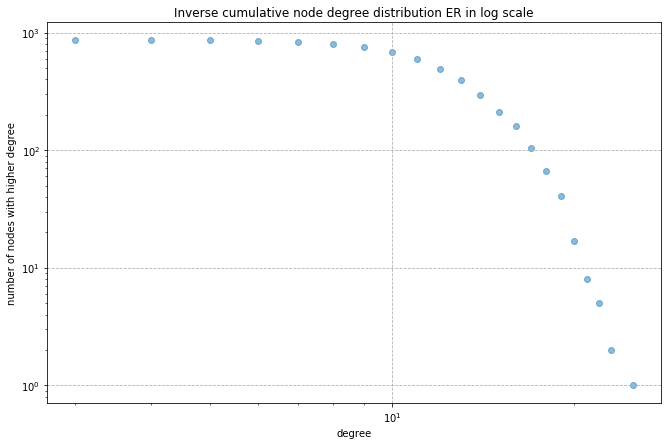

In [72]:
figure(figsize=(11,7))

plt.scatter(x = erg_d_unique2,
            y = np.cumsum(erg_d_counts2[::-1])[::-1], 
            alpha=0.5)

plt.title('Inverse cumulative node degree distribution ER in log scale')
plt.xlabel('degree')
plt.ylabel('number of nodes with higher degree')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

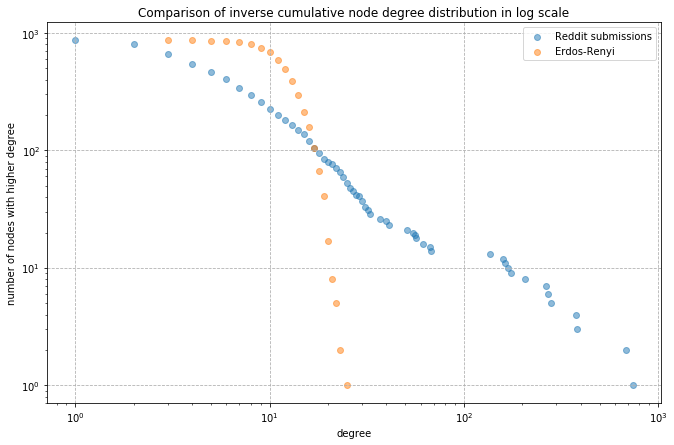

In [90]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = np.cumsum(g_d_counts[::-1])[::-1], 
            alpha=0.5, label='Reddit submissions')

plt.scatter(x = erg_d_unique2,
            y = np.cumsum(erg_d_counts2[::-1])[::-1], 
            alpha=0.5, label="Erdos-Renyi")

plt.title('Comparison of inverse cumulative node degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('number of nodes with higher degree')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.legend(loc='upper right', frameon=True)

plt.grid(linestyle='dashed')
plt.show() # show the plot

#### c. Distribution of shortest paths length $P(l)$

In [22]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [23]:
g_sp = g.shortest_paths()
g_sp_flatten = flatten(g_sp)

g_sp_unique, g_sp_counts = np.unique(g_sp_flatten, return_counts=True)

In [24]:
# import seaborn as sns
# sns.distplot(g_sp_flatten)

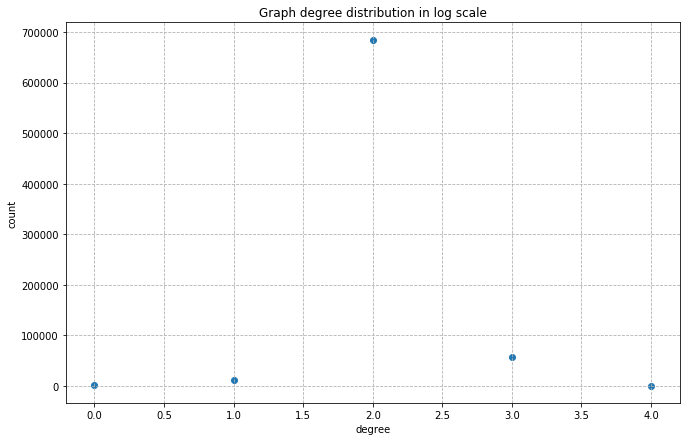

In [25]:
x = g_sp_unique
y = g_sp_counts
            
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]


def graph_degree_approximator(x,a,b):
    return x*b+a

y2 = graph_degree_approximator(x,a,b)



figure(figsize=(11,7))

plt.scatter(x = g_sp_unique,
            y = g_sp_counts, 
            alpha=1)
# plt.scatter(x = x, y = y2, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

# plt.yscale('log')
# plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

In [26]:
erg_sp = erg.shortest_paths()
erg_sp_flatten = flatten(erg_sp)

erg_sp_unique, erg_sp_counts = np.unique(erg_sp_flatten, return_counts=True)

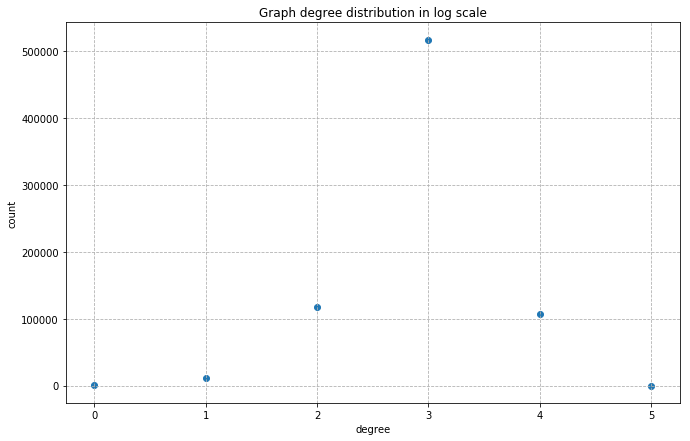

In [27]:
x = erg_sp_unique
y = erg_sp_counts
            
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]


def graph_degree_approximator(x,a,b):
    return x*b+a

y2 = graph_degree_approximator(x,a,b)


figure(figsize=(11,7))

plt.scatter(x = erg_sp_unique,
            y = erg_sp_counts, 
            alpha=1)
# plt.scatter(x = x, y = y2, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

# plt.yscale('log')
# plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

#### d. Distribution of local clustering coefficients $P(C)$

In [28]:
g_transitivity = g.transitivity_local_undirected()
erg_transitivity = erg.transitivity_local_undirected()

In [29]:
# x = x[np.logical_not(np.isnan(g_gtr_unique))]

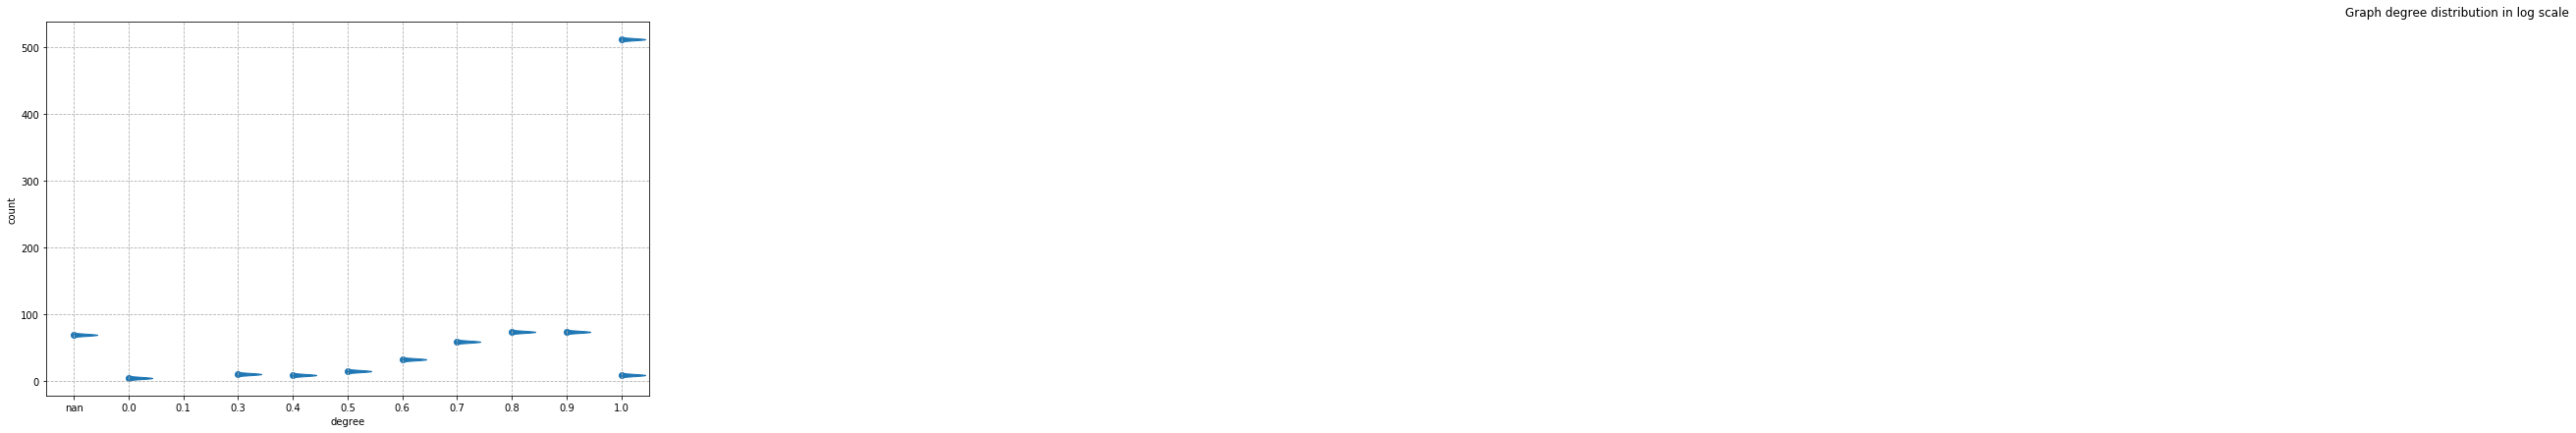

In [30]:
gtr = ['%.1f' % elem for elem in g_transitivity]

g_gtr_unique, g_gtr_counts = np.unique(gtr, return_counts=True)

figure(figsize=(11,7))

plt.scatter(x = g_gtr_unique,
            y = g_gtr_counts, 
            alpha=1)

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

# plt.yscale('log')
# plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

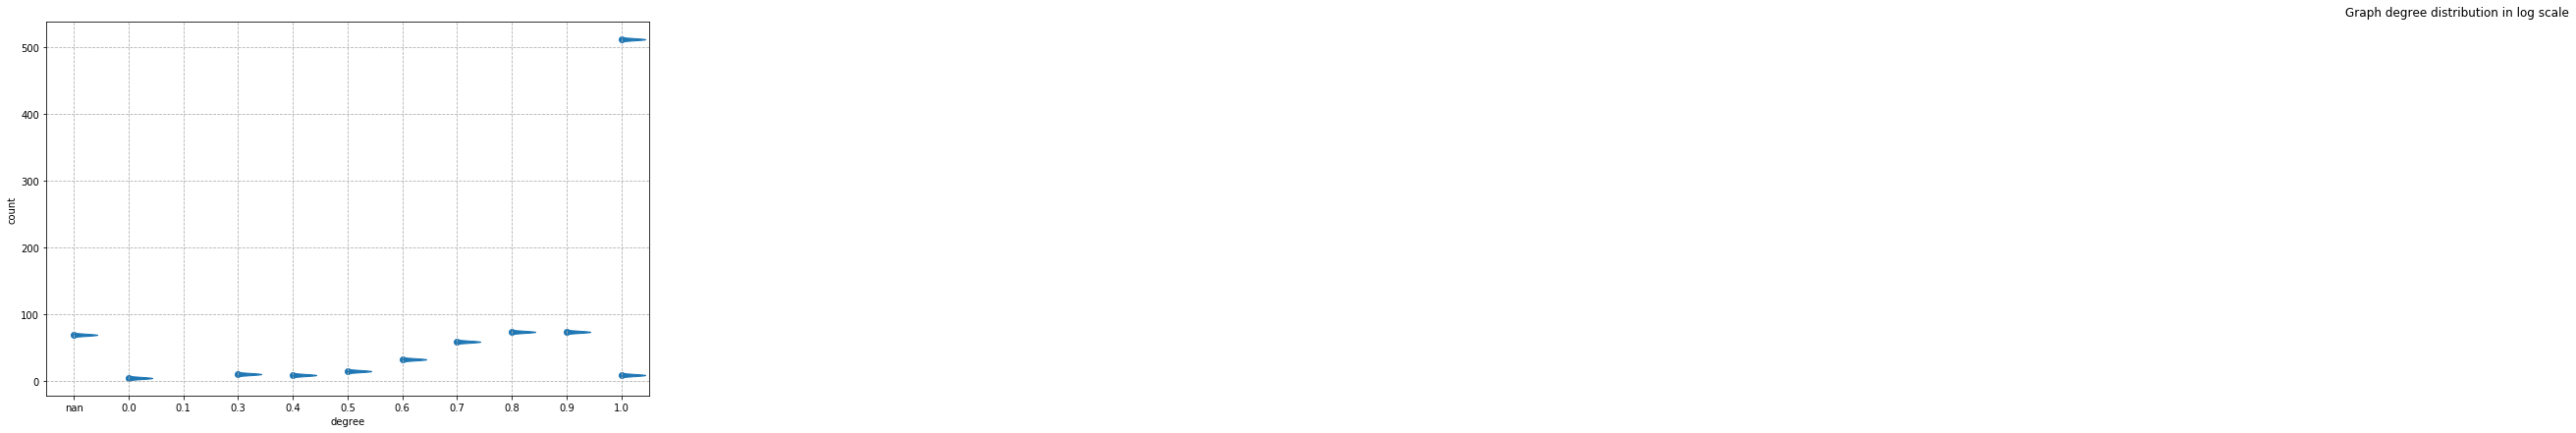

In [31]:
def graph_degree_approximator(x,a,b):
    return x*b+a


gtr = ['%.1f' % elem for elem in g_transitivity]

g_gtr_unique, g_gtr_counts = np.unique(gtr, return_counts=True)

x1 = g_gtr_unique.astype(float)
x = x1[~np.isnan(x1)]#np.any(np.isnan(g_gtr_unique))

#`x = g_gtr_unique[~numpy.isnan(g_gtr_unique)]
#x = g_gtr_unique
y = g_gtr_counts[~np.isnan(x1)]

lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]

y2 = graph_degree_approximator(x,a,b)



figure(figsize=(11,7))

plt.scatter(x = g_gtr_unique,
            y = g_gtr_counts, 
            alpha=1)
# plt.scatter(x = x, y = y2, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

# plt.yscale('log')
# plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

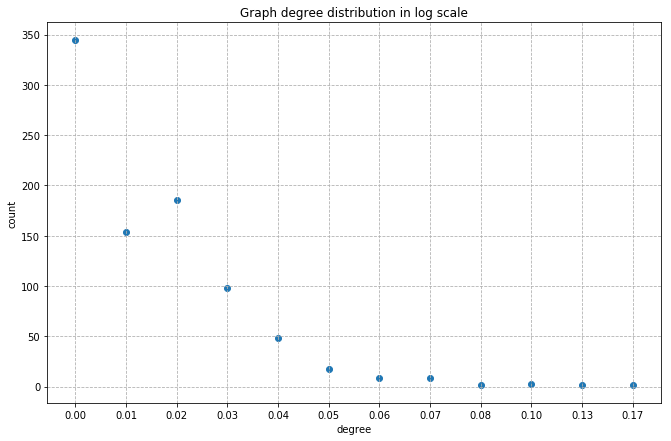

In [32]:
def graph_degree_approximator(x,a,b):
    return x*b+a

erg_tr = ['%.2f' % elem for elem in erg_transitivity]

erg_tr_unique, erg_tr_counts = np.unique(erg_tr, return_counts=True)


x1 = erg_tr_unique.astype(float)
x = x1[~np.isnan(x1)]#np.any(np.isnan(g_gtr_unique))

#`x = g_gtr_unique[~numpy.isnan(g_gtr_unique)]
#x = g_gtr_unique
y = erg_tr_counts[~np.isnan(x1)]

lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)

a = lr.intercept_
b = lr.coef_[0]

y2 = graph_degree_approximator(x,a,b)


figure(figsize=(11,7))

plt.scatter(x = erg_tr_unique,
            y = erg_tr_counts, 
            alpha=1)
# plt.scatter(x = x, y = y2, color='red')

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

# plt.yscale('log')
# plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

<br/>
### 2. Investigate correlations (by plot the following dependencies) between:

#### a. Local clustering coefficient as a function of node degree $k$ (note: for plot to look better, average $C$ for all the nodes with given $k$)

#### b. Betweenness centrality of a node vs its’ degree $k C^B(k)$

#### c. Assortativity by local clustering coefficient (Pearson correlation coefficient of $C$)

<br/><br/>
### 3. Investigate community structure of your network using Louvain algorithm:

#### a. Modularity $Q$ of the optimal partition

In [33]:
g_cm = g.community_multilevel()
g_m = round(g.modularity(g_cm), 2)

erg_cm = erg.community_multilevel()
erg_m = round(erg.modularity(erg_cm), 2)

print("Modularity Q of the optimal partition = {0}".format(g_m))
print("Modularity Q of the optimal partition (ER) = {0}".format(erg_m))

Modularity Q of the optimal partition = 0.24
Modularity Q of the optimal partition (ER) = 0.25


In [34]:
#TODO: validate ER Mo
#we can say anything significant in this case


#TODO:
#check for cliques, sizes, topology

#### b. The number $nc$ of clusters in optimal partition

In [35]:
print("The number nc of clusters in optimal partition = {0}".format(len(g_cm)))
print("The number nc of clusters in optimal partition (ER) = {0}".format(len(erg_cm)))

The number nc of clusters in optimal partition = 10
The number nc of clusters in optimal partition (ER) = 13


#### c. Distribution of cluster sizes of the optimal partition $P(nc)$

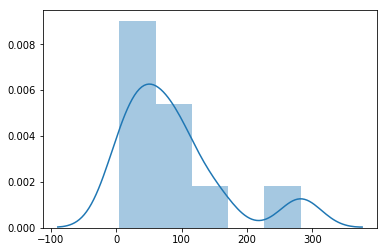

In [36]:
g_clusters_sizes = np.array(list(map(len,g_cm)))

sns.distplot(g_clusters_sizes)

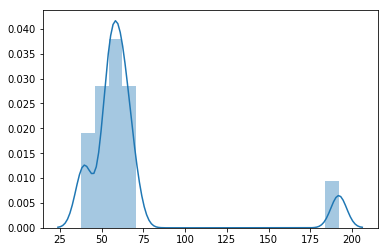

In [37]:
er_clusters_sizes = np.array(list(map(len,erg_cm)))

sns.distplot(er_clusters_sizes)

<br/><br/>
### 4. Investigate the robustness of the network under (note: for large networks and targeted attacks recalculate properties of nodes after each $1%$ nodes are removed)

In [108]:
g

In [107]:
# import robustness.robustness


#### a. Random removal of nodes

In [38]:
# g_lcc_nodes = g.clusters(mode='weak').giant().vcount()
# erg_lcc_nodes = erg.clusters(mode='weak').giant().vcount()

In [39]:
gvs = g.vs
g_d = g.degree()

In [40]:
l = []

for g_d_tmp in range(0,len(g_d)):
    l.append(gvs[g_d_tmp]['name'])


d = dict(zip(l, g_d))
ds = sorted(d.items(), key=operator.itemgetter(1))

In [41]:
ds

[(-1, 1),
 (15, 1),
 (28, 1),
 (41, 1),
 (53, 1),
 (58, 1),
 (80, 1),
 (87, 1),
 (99, 1),
 (111, 1),
 (122, 1),
 (141, 1),
 (149, 1),
 (152, 1),
 (604, 1),
 (328, 1),
 (378, 1),
 (158, 1),
 (161, 1),
 (188, 1),
 (196, 1),
 (202, 1),
 (217, 1),
 (247, 1),
 (257, 1),
 (262, 1),
 (296, 1),
 (306, 1),
 (332, 1),
 (342, 1),
 (362, 1),
 (372, 1),
 (376, 1),
 (377, 1),
 (731, 1),
 (398, 1),
 (399, 1),
 (401, 1),
 (468, 1),
 (434, 1),
 (463, 1),
 (465, 1),
 (486, 1),
 (499, 1),
 (503, 1),
 (512, 1),
 (521, 1),
 (835, 1),
 (801, 1),
 (593, 1),
 (712, 1),
 (823, 1),
 (728, 1),
 (844, 1),
 (725, 1),
 (707, 1),
 (674, 1),
 (789, 1),
 (649, 1),
 (842, 1),
 (606, 1),
 (652, 1),
 (656, 1),
 (663, 1),
 (773, 1),
 (851, 1),
 (758, 1),
 (785, 1),
 (853, 1),
 (2, 2),
 (805, 2),
 (5, 2),
 (277, 2),
 (124, 2),
 (177, 2),
 (16, 2),
 (30, 2),
 (179, 2),
 (44, 2),
 (48, 2),
 (52, 2),
 (54, 2),
 (57, 2),
 (61, 2),
 (159, 2),
 (69, 2),
 (73, 2),
 (76, 2),
 (82, 2),
 (94, 2),
 (102, 2),
 (105, 2),
 (553, 2),
 (6

In [93]:
i[0]

539

In [101]:
gb = g.copy()
gb = gb.delete_vertices(i[0])

In [103]:
gb

In [102]:
gb = g.copy()

for i in reversed(ds):
    gb = gb.delete_vertices(i[0])
    
    print(i[0], "  ", i[1])
    
#     g_lcc_nodes = gb.clusters(mode='weak').giant().vcount()
#     print("Number of nodes in the GCC = {0}".format(g_lcc_nodes))
    
    
#     g_lcc_nodes = gb.clusters(mode='weak').giant().vcount()
#     print("% of nodes in the GCC = {0}".format(g.vcount()/g_lcc_nodes))

539    743


AttributeError: 'NoneType' object has no attribute 'delete_vertices'

In [42]:
for v in g.vs:
    if 161 not in v['label']

SyntaxError: invalid syntax (<ipython-input-42-75c364239427>, line 2)

In [ ]:
to_delete_ids = [v.index for v in g.vs if '@enron.com' not in v['label']]
G.delete_vertices(to_delete_ids)

#### b. Attacks targeted on high degree nodes

#### c. Attacks targeted on high betweenness nodes $d$. Attacks on high closeness nodes

<br/><br/>
### 5. Draw the network using inbuilt igraph layouts or using any other tool.

In [123]:
import networkx as nx

In [126]:
A = g.get_edgelist()
B = erg.get_edgelist()
#G = networkx.DiGraph(A) # In case your graph is directed
G2 = nx.Graph(A) # In case you graph is undirected
G3 = nx.Graph(B) # In case you graph is undirected

options = {'node_size': 10}

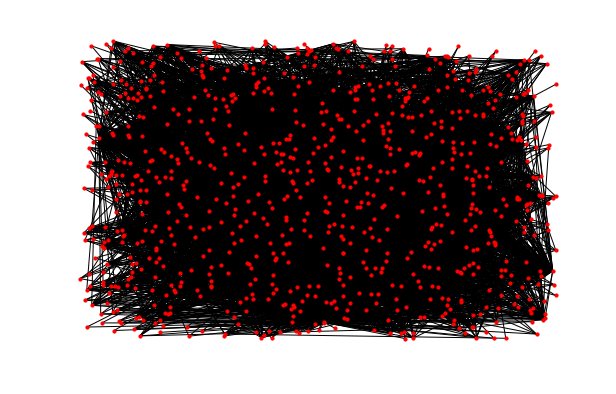

In [125]:
plt.rc('figure', figsize=[8,5])

nx.draw_random(G2, with_labels=False, **options)

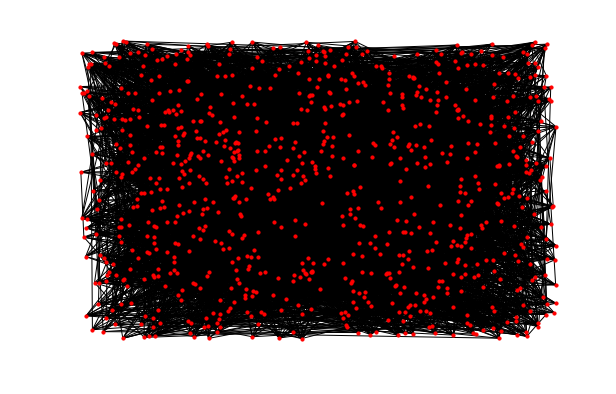

In [127]:
plt.rc('figure', figsize=[8,5])

nx.draw_random(G3, with_labels=False, **options)

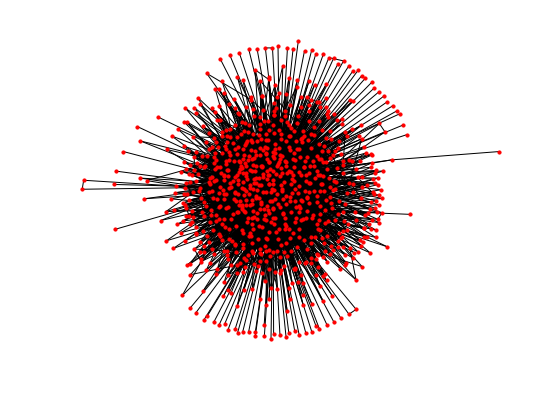

In [128]:
plt.rc('figure', figsize=[7,5])

nx.draw_spring(G2, with_labels=False, **options)

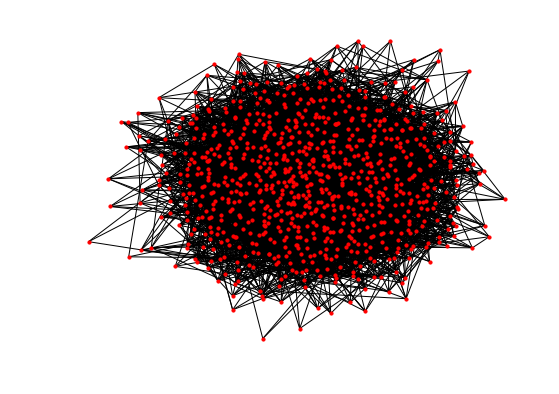

In [129]:
plt.rc('figure', figsize=[7,5])

nx.draw_spring(G3, with_labels=False, **options)

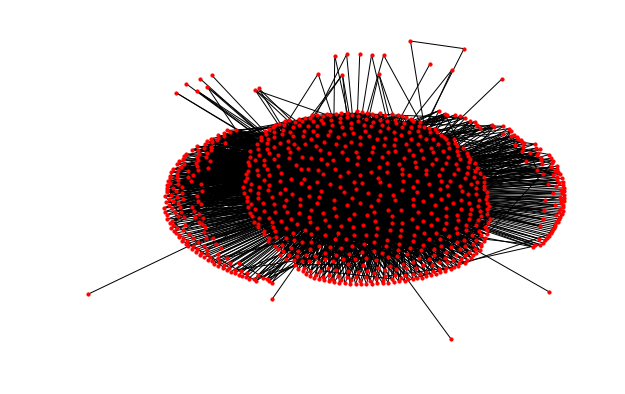

In [130]:
plt.rc('figure', figsize=[8,5])

nx.draw_kamada_kawai(G2, with_labels=False, **options)

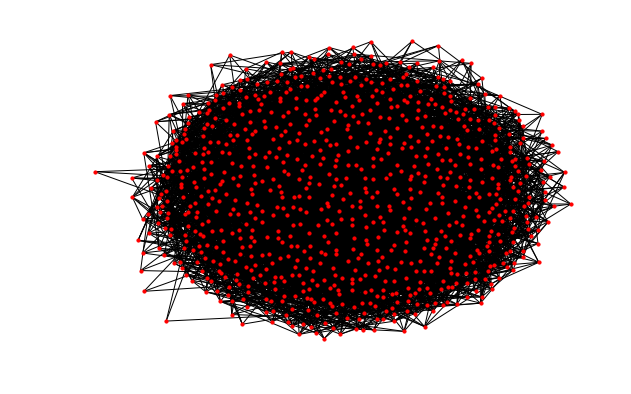

In [131]:
plt.rc('figure', figsize=[8,5])

nx.draw_kamada_kawai(G3, with_labels=False, **options)

In [58]:
# import 

# igraph.write(g, filename="tmp2.dot", format="dot")

# (graph,) = pydot.graph_from_dot_file('tmp2.dot')


# graph.write_png('tmp.png')